<a href="https://colab.research.google.com/github/0xVolt/cemetery-of-culture/blob/main/year-3/image-processing/programming-assignment-2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image Processing Programming Assignment 2

### _Question_

Take an image of yourself and apply various edge detection algorithms. Experiment with adding noise to the image artificially with various kinds of noises. Analyse the histogram of the noisy and regular images before and after applying the edge detection algorithms. Apply image segmentation with thresholding, OATS and other segmentation techniques. As a bonus, use HOD, SIFT and SURF algorithms to extract the features from the image.

### _To do_

- Get an image to work with
- Get the image's histogram
- Add noise to the image. Try,
  - Gaussian noise
  - Salt and pepper, etc.
  - Check out the image's histogram and compare
- Apply edge detection algorithms
  - First order
    - Sobel filter
    - Pivot filter
  - Second order
    - Laplacian filter
  - Canny edge detector
  - Analyse efficiency and quality of images that come off the filters
    - Histograms
    - Side-by-side comparison
    - etc.
- Apply image segmentation algorithms
  - Thresholding
    - Global
    - Local
    - Adaptive
  - OATS
  - Analyse the different methods
- Apply feature detection algorithms
  - Histogram of Oriented Detection (HOD)
  - SIFT
  - SURF
  - Analyse the different methods

---


# 0. Import dependencies


Importing libraries for image manipulation and plotting.


In [49]:
import cv2
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
import skimage


Listing out all the image dependencies present in the `./assets` folder.


In [50]:
print(os.listdir('./assets'))


['indoors.jpg']


Importing image and displaying it.


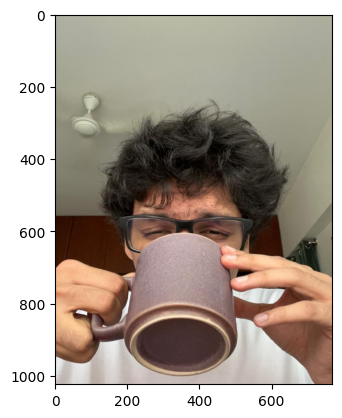

In [51]:
img = plt.imread('./assets/indoors.jpg')
plt.imshow(img)


# 1. Creating images' histogram

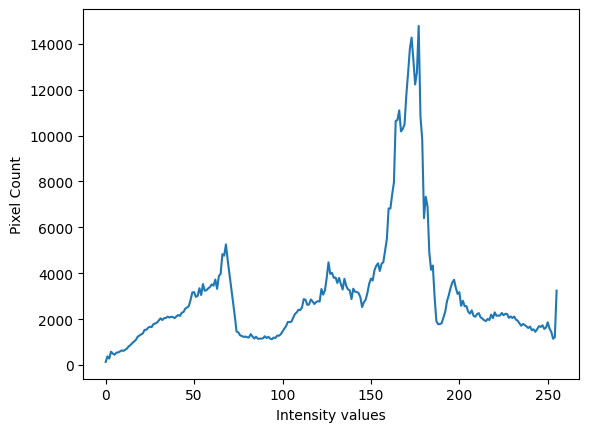

In [52]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.xlabel('Intensity values')
plt.ylabel('Pixel Count')
plt.plot(histogram)

plt.show()

# 2. Adding noise to the image

In [53]:
gaussian_image = skimage.util.random_noise(img, mode='gaussian', seed=None, clip=True, mean=0.25)
speckle_image = skimage.util.random_noise(img, mode='speckle', seed=None, clip=True, mean=0.7)
poisson_image = skimage.util.random_noise(img, mode='poisson', seed=None, clip=True)
salt_and_pepper_image = skimage.util.random_noise(img, mode='s&p', seed=None, clip=True, amount=0.75)


In [54]:
dict_of_images = {
    'Original': img, 
    'Gaussian Noise': gaussian_image, 
    'Speckle Noise': speckle_image, 
    'Poisson Noise': poisson_image, 
    'Salt and Pepper Noise': salt_and_pepper_image
}

In [55]:
dict_of_images

{'Original': array([[[175, 176, 160],
         [175, 176, 160],
         [175, 176, 160],
         ...,
         [174, 175, 157],
         [174, 175, 157],
         [174, 175, 157]],
 
        [[175, 176, 160],
         [175, 176, 160],
         [175, 176, 160],
         ...,
         [174, 175, 157],
         [174, 175, 157],
         [174, 175, 157]],
 
        [[175, 176, 160],
         [175, 176, 160],
         [175, 176, 160],
         ...,
         [173, 174, 156],
         [174, 175, 157],
         [174, 175, 157]],
 
        ...,
 
        [[213, 209, 208],
         [210, 206, 205],
         [207, 203, 202],
         ...,
         [146, 105,  85],
         [147, 106,  86],
         [147, 106,  86]],
 
        [[211, 207, 206],
         [208, 204, 203],
         [205, 201, 200],
         ...,
         [148, 107,  87],
         [148, 107,  87],
         [149, 108,  88]],
 
        [[210, 206, 205],
         [207, 203, 202],
         [204, 200, 199],
         ...,
         [149, 1

In [56]:
for elt in dict_of_images:
    print(elt)

Original
Gaussian Noise
Speckle Noise
Poisson Noise
Salt and Pepper Noise


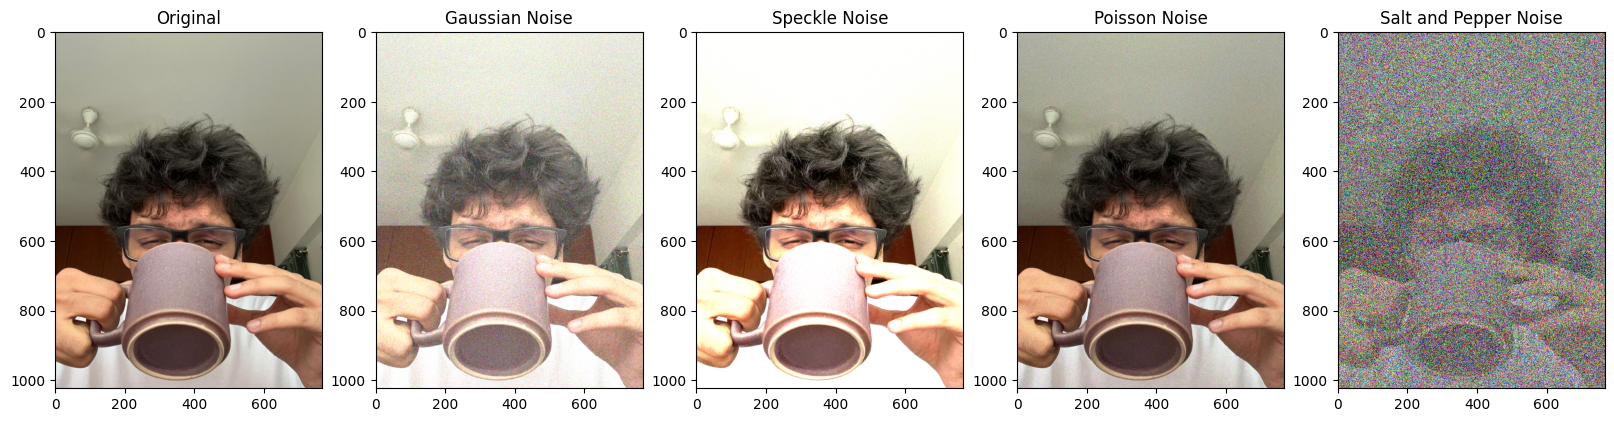

In [57]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

i = 0
for elt in dict_of_images:
    ax[i].imshow(dict_of_images[elt])
    ax[i].set_title(elt)
    
    i += 1

# 3. Edge Detection 

## 3.1 Sobel Edge Detection for images with different kinds of noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


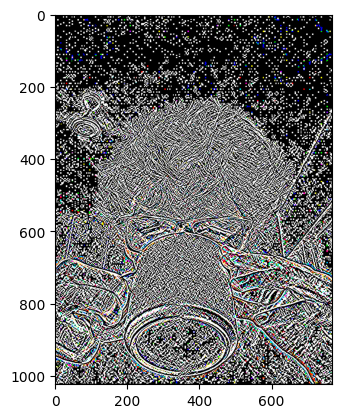

In [58]:
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

In [59]:
sobel = dict()

for elt in dict_of_images:
    sobel[elt] = cv2.Sobel(dict_of_images[elt], cv2.CV_64F, 1, 0, ksize=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


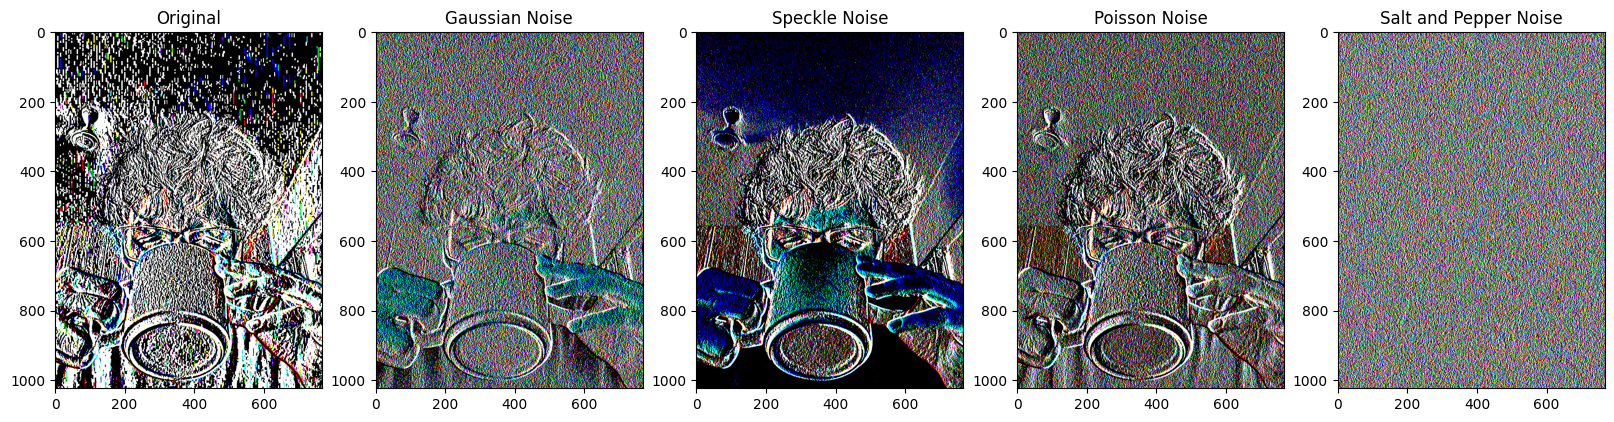

In [60]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

i = 0
for elt in sobel:
    ax[i].imshow(sobel[elt])
    ax[i].set_title(elt)
    
    i += 1

## 3.2 Laplace Edge Detection for images with different kinds of noise

In [61]:
laplace = dict()

for elt in dict_of_images:
    laplace[elt] = cv2.Laplacian(dict_of_images[elt], cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


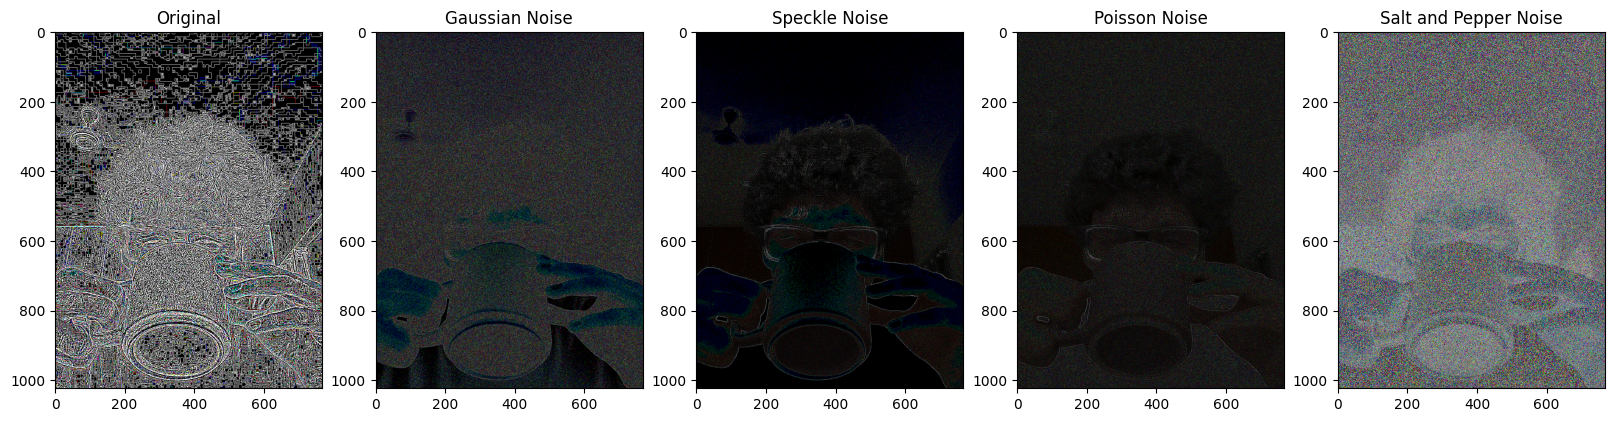

In [62]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

i = 0
for elt in laplace:
    ax[i].imshow(laplace[elt])
    ax[i].set_title(elt)
    
    i += 1

## 3.3 Canny Edge Detection for the original image

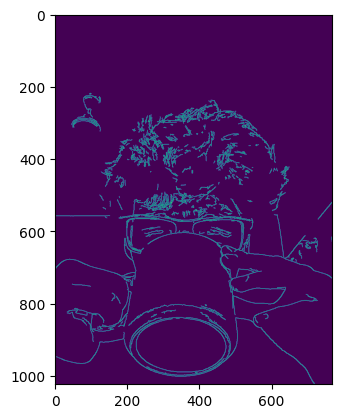

In [77]:
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny)